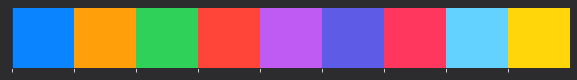

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cycler import cycler
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]
raw_darks=[
    (44, 44, 46)
]
raw_lights=[
    (229, 229, 234)
]
miscellaneous={
    'blue':'#0f71d4',
    'green':'#14b827',
    'red':'#cf0c0c'
}

dark_palette=np.array(raw_dark_palette)/255
darks=np.array(raw_darks)/255
lights=np.array(raw_lights)/255

#rcparams
dark_color=darks[-1]
light_color=lights[-1]

mpl.rcParams['axes.prop_cycle']=cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']=dark_color
mpl.rcParams['figure.edgecolor']=dark_color
mpl.rcParams['axes.facecolor']=dark_color
mpl.rcParams['text.color']=light_color
mpl.rcParams['axes.labelcolor']=light_color
mpl.rcParams['axes.edgecolor']=dark_color
mpl.rcParams['xtick.color']=light_color
mpl.rcParams['ytick.color']=light_color
mpl.rcParams['figure.dpi']=80
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

sns.palplot(dark_palette)

In [7]:
sub1=pd.read_csv('blend_files/sub1_1.08543.csv')
sub2=pd.read_csv('blend_files/sub2_1.08590.csv')
sub3=pd.read_csv('blend_files/sub5_1.10_tf.csv')
sub4=pd.read_csv('blend_files/sub6_1.0518.csv')
sub5=pd.read_csv('blend_files/sub7_nb.csv')

In [9]:
cols=['Class_1','Class_2','Class_3','Class_4']
output=pd.read_csv('data/sample_submission.csv')

In [5]:
for col in cols:
    output[col]=sub1[col]*0.6+sub2[col]*0.4

In [5]:
for col in cols:
    output[col]=sub1[col]*0.99

In [13]:
for col in cols:
    output[col]=sub5[col]*0.9

In [15]:
output.head()

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.081854,0.561093,0.151318,0.105735
1,100001,0.079906,0.623101,0.122244,0.075130
2,100002,0.075483,0.583182,0.153440,0.087894
3,100003,0.080090,0.483148,0.248487,0.088390
4,100004,0.070223,0.568530,0.163688,0.097743


In [14]:
output.to_csv('submissions/sub13.csv',index=False)

In [18]:
def blend_submission(name,files,fracs):
    output=pd.read_csv('data/sample_submission.csv')
    output['Class_1']=0.0
    output['Class_2']=0.0
    output['Class_3']=0.0
    output['Class_4']=0.0
    for file,frac in zip(files,fracs):
        output['Class_1']+=frac*file['Class_1']
        output['Class_2']+=frac*file['Class_2']
        output['Class_3']+=frac*file['Class_3']
        output['Class_4']+=frac*file['Class_4']
    output.to_csv(f'submissions/{name}.csv',index=False)

In [26]:
files=[sub5,sub4]
fracs=[0.6,0.5]

In [27]:
blend_submission('sub16',files,fracs)